In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from sklearn.datasets import fetch_openml

In [33]:
eeg = fetch_openml(data_id=1471, as_frame=True)

/Users/quangtn/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
increment = 117 / len(eeg['data'])
increment

0.00781041388518024

In [35]:
import numpy as np
index = np.linspace(
    start=0,
    stop=increment*len(eeg['data']),
    num=len(eeg['data'])
)
index

array([0.00000000e+00, 7.81093531e-03, 1.56218706e-02, ...,
       1.16984378e+02, 1.16992189e+02, 1.17000000e+02])

In [36]:
ts_index = pd.to_datetime(index, unit='s')
ts_index

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.007810935',
               '1970-01-01 00:00:00.015621870',
               '1970-01-01 00:00:00.023432805',
               '1970-01-01 00:00:00.031243741',
               '1970-01-01 00:00:00.039054676',
               '1970-01-01 00:00:00.046865611',
               '1970-01-01 00:00:00.054676547',
               '1970-01-01 00:00:00.062487482',
               '1970-01-01 00:00:00.070298417',
               ...
               '1970-01-01 00:01:56.929701582',
               '1970-01-01 00:01:56.937512517',
               '1970-01-01 00:01:56.945323452',
               '1970-01-01 00:01:56.953134388',
               '1970-01-01 00:01:56.960945323',
               '1970-01-01 00:01:56.968756258',
               '1970-01-01 00:01:56.976567194',
               '1970-01-01 00:01:56.984378129',
               '1970-01-01 00:01:56.992189064',
                         '1970-01-01 00:01:57'],
              dtype=

In [37]:
v1 = pd.Series(name='V1', data=eeg['data']['V1'].values, index=ts_index)

In [10]:
v1

1970-01-01 00:00:00.000000000    4329.23
1970-01-01 00:00:00.007810935    4324.62
1970-01-01 00:00:00.015621870    4327.69
1970-01-01 00:00:00.023432805    4328.72
1970-01-01 00:00:00.031243741    4326.15
                                  ...   
1970-01-01 00:01:56.968756258    4281.03
1970-01-01 00:01:56.976567194    4276.92
1970-01-01 00:01:56.984378129    4277.44
1970-01-01 00:01:56.992189064    4284.62
1970-01-01 00:01:57.000000000    4287.69
Name: V1, Length: 14980, dtype: float64

In [47]:
slicing = (v1.index >= '1970-01-01 00:00:08') & (v1.index <= '1970-01-01 00:01:10.0000000')

In [48]:
slicing # Sorry for type wrong "slicing"

array([False, False, False, ..., False, False, False])

In [49]:
v1[slicing]

1970-01-01 00:00:08.006208692    4289.74
1970-01-01 00:00:08.014019627    4284.10
1970-01-01 00:00:08.021830562    4280.00
1970-01-01 00:00:08.029641498    4289.74
1970-01-01 00:00:08.037452433    4298.46
                                  ...   
1970-01-01 00:01:09.962547566    4289.74
1970-01-01 00:01:09.970358501    4283.08
1970-01-01 00:01:09.978169437    4284.62
1970-01-01 00:01:09.985980372    4289.23
1970-01-01 00:01:09.993791307    4290.77
Name: V1, Length: 7937, dtype: float64

Text(0, 0.5, 'voltage')

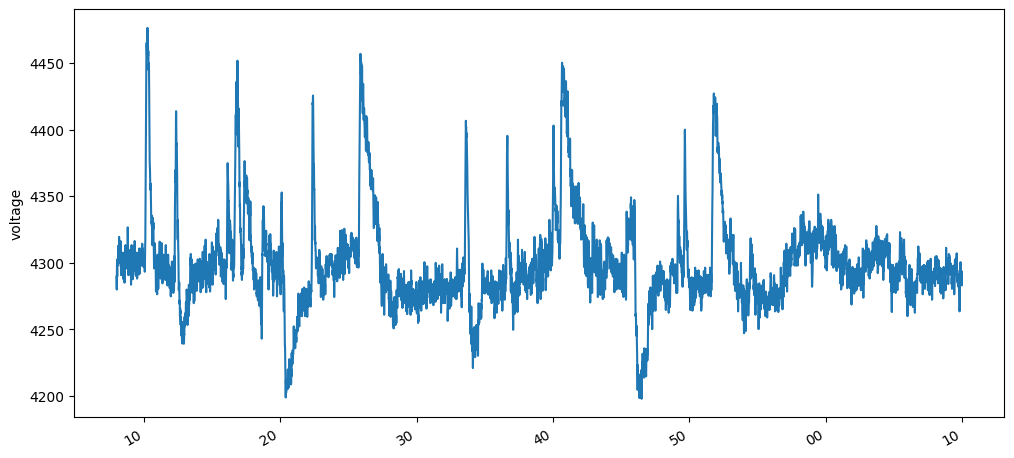

In [50]:
date_formatter = DateFormatter("%S")
ax = v1[slicing].plot(figsize=(12, 6))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel('voltage')

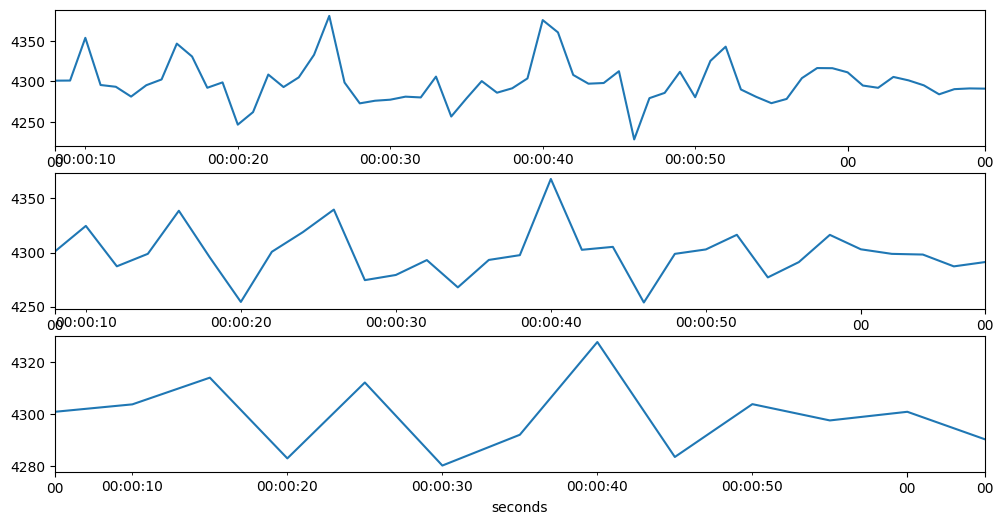

In [51]:
plt.subplot(311)
ax1 = v1[slicing].resample('1s').mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(312)
ax1 = v1[slicing].resample('2s').mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(313)
ax2 = v1[slicing].resample('5s').mean().plot(figsize=(12, 6))
ax2.xaxis.set_major_formatter(date_formatter)
plt.xlabel('seconds');

In [52]:
from scipy import signal
fs = len(eeg['data']) // 117
f, Pxx_den = signal.welch(
    v1[slicing].values,
    fs,
    nperseg=2048,
    scaling='spectrum'
)

Text(0, 0.5, 'PSD [V**2/Hz]')

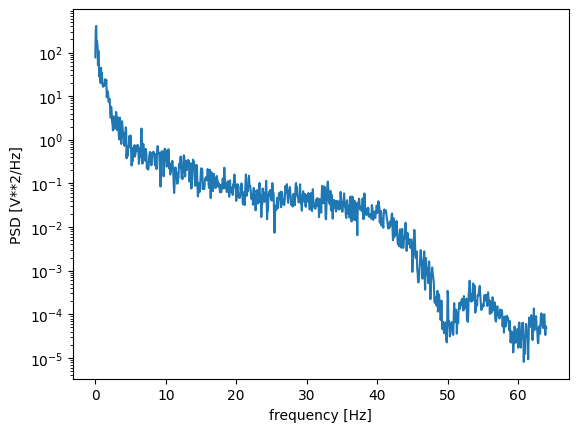

In [53]:
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')